### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data

data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
#Selecting the 5 columns to work with

df = data[["engine_displacement", "horsepower", "vehicle_weight", "model_year", "fuel_efficiency_mpg"]]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


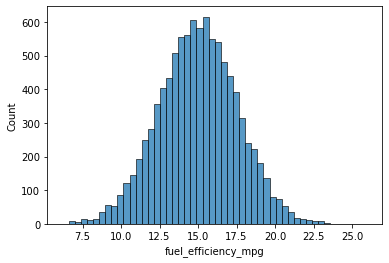

In [5]:
#Visualizing the "fuel_efficiency_mpg" column

sns.histplot(x="fuel_efficiency_mpg", data=df, bins=50)
plt.show()

In [6]:
#Checking for missing values

df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [7]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


### Splitting the data

In [8]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n- n_val - n_test

n, n_val+n_test+n_train

(9704, 9704)

In [9]:
idx = np.arange(n)

In [10]:
np.random.seed(42)
np.random.shuffle(idx)

In [11]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [12]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [15]:
y_train = df_train.fuel_efficiency_mpg.values 
y_val   = df_val.fuel_efficiency_mpg.values 
y_test  = df_test.fuel_efficiency_mpg.values 

In [16]:
len(y_train)

5824

In [17]:
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]


In [18]:
df.mean()

engine_displacement     199.708368
horsepower              149.657292
vehicle_weight         3001.280993
model_year             2011.484027
fuel_efficiency_mpg      14.985243
dtype: float64

### Dealing with Missing Values and Training model

##### Filling mssing values with 0 + Linear Regression 

In [19]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [20]:
df_train_copy = df_train.copy()

X_train_0 = df_train_copy.fillna(0).values

w0, w = train_linear_regression(X_train_0, y_train)

y_pred_0 = w0 + X_train_0.dot(w)
y_pred_0

array([17.33526223, 16.29296317, 17.69885099, ..., 17.54541307,
       18.78287539, 17.86564843])

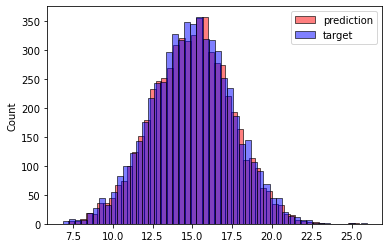

In [21]:
sns.histplot(y_pred_0, label = 'prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label = 'target', color='blue', alpha=0.5, bins=50)
plt.legend()

##### Filling mssing values with mean + Linear Regression 

In [22]:
X_train = df_train.fillna(df_train['horsepower'].mean())


w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
y_pred

0       17.259110
1       16.190113
2       17.692459
3       11.814410
4       18.934381
          ...    
5819    16.856287
5820     9.785104
5821    17.516664
5822    18.778124
5823    17.845934
Length: 5824, dtype: float64

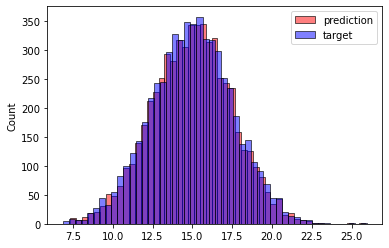

In [23]:
sns.histplot(y_pred,label = 'prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label = 'target', color='blue', alpha=0.5, bins=50)
plt.legend()

### RMSE and Validation 

In [24]:
#Calculating RMSE for Linear Regression with filling misssing value with mean

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [25]:
round(rmse(y_train, y_pred), 2)

0.46

In [26]:
#Evaluating model (Linear regression with fiiling missing value with 0)with validating dataset and calculating RMSE

X_train_0 = df_train_copy.fillna(0).values
w0, w = train_linear_regression(X_train_0, y_train)

X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

0.52

### Regularization and Model Tuning

In [27]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [28]:
for r in [0.0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train_0 = df_train_copy.fillna(0).values
    w0, w = train_linear_regression_reg(X_train_0, y_train, r =r)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,2))

0.0 28.827365476143953 0.52
0.01 24.926838421020353 0.52
0.1 11.23966108504652 0.52
1 1.7315979412697593 0.52
5 0.3638075020731068 0.52
10 0.1830624662272038 0.52
100 0.018418017307654876 0.52


### Question 5


In [29]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [30]:
# splitting the length of data frame to train, val, and test data
t = len(df)

t_val = int(t * 0.2)
t_test = int(t * 0.2)
t_train = t- t_val - t_test

t, t_val+t_test+t_train

(9704, 9704)

In [31]:
rmse_scores = []

for s in range(10):
    indx = np.arange(t)
    np.random.seed(s)
    np.random.shuffle(indx)
    
    train_df = df.iloc[indx[:t_train]]
    val_df = df.iloc[indx[t_train:t_train + t_val]]
    test_df = df.iloc[indx[t_train + t_val:]]
    
    train_df = train_df.reset_index(drop=True)
    val_df = val_df.reset_index(drop=True)
    test_df = test_df.reset_index(drop=True)
    
    y_train = train_df.fuel_efficiency_mpg.values 
    y_val   = val_df.fuel_efficiency_mpg.values 
    y_test  = test_df.fuel_efficiency_mpg.values 
    
    del train_df["fuel_efficiency_mpg"]
    del val_df["fuel_efficiency_mpg"]
    del test_df["fuel_efficiency_mpg"]
    
    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)
    
        return w_full[0], w_full[1:]
    

    X_train = train_df.fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)

    
    
    def rmse(y, y_pred):
        se = (y - y_pred) ** 2
        mse = se.mean()
        return np.sqrt(mse)
    
    X_val = val_df.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    rmse_scores.append(score)
    

std = np.std(rmse_scores)
print("Standard deviation of RMSE scores:", round(std, 3))


Standard deviation of RMSE scores: 0.007


### Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?


In [32]:
# splitting the length of data frame to train, val, and test data
t = len(df)

t_val = int(t * 0.2)
t_test = int(t * 0.2)
t_train = t- t_val - t_test

t, t_val+t_test+t_train

(9704, 9704)

In [33]:
# Combining train and validation datasets.

t_train_full = t_train + t_val

In [34]:
indx = np.arange(t)

np.random.seed(9)
np.random.shuffle(indx)

In [35]:
train_df_full = df.iloc[indx[:t_train_full]]
test_df = df.iloc[indx[t_train_full:]]
    
train_df_full = train_df_full.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
    
y_train = train_df_full.fuel_efficiency_mpg.values  
y_test  = test_df.fuel_efficiency_mpg.values 
    
del train_df_full["fuel_efficiency_mpg"]
del test_df["fuel_efficiency_mpg"]

In [36]:
 
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

X_train = train_df_full.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.70485825, 14.02234422, 15.12754308, ..., 13.31158695,
       17.55565057, 16.61070902])

In [37]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [38]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


r = 0.001
X_train = train_df_full.fillna(0).values
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
y_pred = w0 + X_train.dot(w)
score = rmse(y_train, y_pred)
score

0.5197448026201094

In [39]:
#Using Test data

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


r = 0.001
X_test = test_df.fillna(0).values
w0, w = train_linear_regression_reg(X_test, y_test, r=r)
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test, y_pred), 3)
print('RMSE on the test data set is: ', score)

RMSE on the test data set is:  0.515
